In [68]:
#pip install seaborn

In [69]:
#import tensorflow as tf

In [70]:
#pip install scikit-learn

In [71]:
#pip install tensorflow_datasets

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import scipy.sparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime
import tensorflow_datasets as tfds
import IPython
import IPython.display

Download the data from the github
- Set the start and end date for the data
- Set the data directory where the downloaded datasets are stored

In [73]:
#def download_economic_data():
  #  dl_manager = tfds.download.DownloadManager(download_dir = '/tmp/economic_recovery', 
   #                                            extract_dir='/tmp/economic_recovery')
    #path = dl_manager.download_and_extract(
     #   'https://github.com/OpportunityInsights/EconomicTracker/tree/main.zip'
    #)
    #data_dir = path + '/EconomicTracker-main/data/'
    #return data_dir


In [74]:

start_date = '2020-03-07'
end_date = '2021-03-06'
#data_dir = download_economic_data()
data_dir = 'C:/Users/user/Desktop/New folder/Machine Learning Project/EconomicTracker-main/data/'
state = 26
IPython.display.clear_output()
print('data dir:',data_dir)

data dir: C:/Users/user/Desktop/New folder/Machine Learning Project/EconomicTracker-main/data/


The function below does the following:

- Read the csv file into Pandas dataframe
- If state is passed, then filter the records for the state (will be using data for Michigan only)
- The data contains three columns for the date. year, month, and day. So, concatenates them and convert it to datetime type
- If a column list is passed, then select only those columns from the dataframe, otherwise use the entire column list available
- If a column contains '.', it will be converted to '0.0'
- The datatype of the columns are converted to float
- Interpolate missing data if any
- Select only the date range passed and return to the caller

In [75]:
def prepare_data(csv_file, start_date=start_date, end_date=end_date, day=None, 
                 state=state, selected_cols=[], interpolate=False):
    df = pd.read_csv(data_dir + csv_file)
    if (state is not None):
        df = df[df['statefips'] == state] 
        
    if (day is None):
        day = 'day'
        
    df['date'] = df[['year', 'month', day]].apply(lambda s : datetime(*s),axis = 1)
    df.drop(('year'), axis=1, inplace=True)
    df.drop(('month'), axis=1, inplace=True)
    df.drop((day), axis=1, inplace=True)
    df.index = pd.DatetimeIndex(df['date'])
    df.sort_index()

    if (len(selected_cols) > 0):
        df = df[selected_cols]
    if (interpolate):
        df = df.reindex(pd.date_range(start_date, end_date), fill_value="NaN")
    df.drop(('date'), axis=1, inplace=True, errors='ignore')
    
    str_cols = df.select_dtypes(include=['object']).columns
    df[str_cols] = df[str_cols].replace({'.':'0.0'})
    
    df = df.astype(float)
    df = df.interpolate(method='linear', axis=0).ffill().bfill()
    df = df[df.index >= start_date] 
    df = df[df.index <= end_date] 
    return df

In [76]:
#03/13/2021

selected_cols=['initclaims_count_regular', 'contclaims_count_regular', 'initclaims_count_combined','contclaims_count_combined',
              'contclaims_count_pua']
ui_claims = prepare_data('UI Claims - State - Weekly.csv', day='day_endofweek', selected_cols=selected_cols, interpolate=True)
ui_claims.tail()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua
2021-03-02,11452.428571,169619.714286,15360.0,301818.285714,126320.571429
2021-03-03,11437.571429,166754.285714,15299.0,226363.714286,94740.428571
2021-03-04,11422.714286,163888.857143,15238.0,150909.142857,63160.285714
2021-03-05,11407.857143,161023.428571,15177.0,75454.571429,31580.142857
2021-03-06,11393.000000,158158.000000,15116.0,0.000000,0.000000


In [77]:
#03/09/2021

selected_cols=['bg_posts_ss60', 'bg_posts_ss70', 'bg_posts_ss30', 'bg_posts_ss55', 'bg_posts_ss65']
burning_glass = prepare_data('Burning Glass - State - Weekly.csv', start_date='2020-03-06', selected_cols=selected_cols, day='day_endofweek', interpolate=True)
burning_glass.head(10)

,bg_posts_ss60,bg_posts_ss70,bg_posts_ss30,bg_posts_ss55,bg_posts_ss65
2020-03-06,0.082200,0.0960,0.079700,0.065100,0.044900
2020-03-07,0.072643,0.0837,0.061800,0.056691,0.033943
2020-03-08,0.063086,0.0714,0.043900,0.048283,0.022986
2020-03-09,0.053529,0.0591,0.026000,0.039874,0.012029
2020-03-10,0.043971,0.0468,0.008100,0.031466,0.001071
2020-03-11,0.034414,0.0345,-0.009800,0.023057,-0.009886
2020-03-12,0.024857,0.0222,-0.027700,0.014649,-0.020843
2020-03-13,0.015300,0.0099,-0.045600,0.006240,-0.031800
2020-03-14,-0.006600,-0.0228,-0.063229,-0.001080,-0.049971
2020-03-15,-0.028500,-0.0555,-0.080857,-0.008400,-0.068143


<AxesSubplot:xlabel='date'>

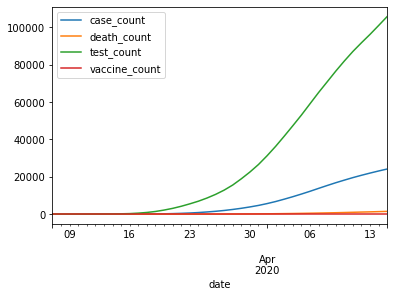

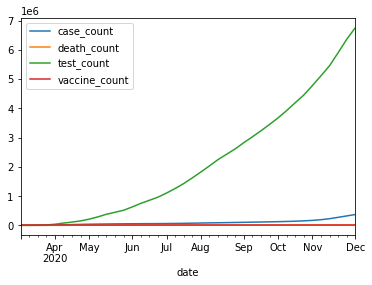

In [78]:
#03/12/2021

selected_cols=['case_count', 'death_count', 'test_count', 'vaccine_count']
covid_mi_daily = prepare_data('COVID - State - Daily.csv', selected_cols=selected_cols)

#using covid_mi_daily.resample('W').mean() to aggregate the daily data into weekly
covid_mi_daily.head(40).plot()
covid_mi_daily.resample('W').mean().head(40).plot()

In [79]:
#03/12/2021

selected_cols=['revenue_ss60', 'revenue_ss70', 'merchants_ss40', 'merchants_ss65', 'merchants_retail']
revenue_daily = prepare_data('Womply - State - Daily.csv', selected_cols=selected_cols)
revenue_daily.resample('W').mean()
revenue_daily.head()

,revenue_ss60,revenue_ss70,merchants_ss40,merchants_ss65,merchants_retail
date,,,,,
2020-03-07,0.0546,-0.0413,-0.00748,-0.0366,-0.00408
2020-03-08,0.1010,-0.0357,-0.00775,-0.0377,-0.00410
2020-03-09,0.0707,-0.0370,-0.00874,-0.0378,-0.00603
2020-03-10,0.0271,-0.0430,-0.00727,-0.0458,-0.00446
2020-03-11,0.0279,-0.0489,-0.00824,-0.0470,-0.00618


In [80]:
#03/12/2021

selected_cols=['spend_acf', 'spend_hcs', 'spend_aer', 'spend_apg', 'spend_grf']
spend_daily = prepare_data('Affinity - State - Daily.csv', selected_cols=selected_cols)
spend_daily.resample('W').mean()
spend_daily.head()

,spend_acf,spend_hcs,spend_aer,spend_apg,spend_grf
date,,,,,
2020-03-07,-0.03040,-0.02080,-0.01440,-0.06010,0.0626
2020-03-08,-0.02830,0.00586,0.00590,-0.02870,0.0817
2020-03-09,-0.02430,-0.04010,-0.01700,-0.03070,0.1030
2020-03-10,-0.00913,0.18600,-0.00624,-0.00236,0.1480
2020-03-11,-0.01250,0.15600,-0.03670,-0.01600,0.2060


In [81]:
#04/01/2021

selected_cols=['emp_combined', 'emp_combined_ss40', 'emp_combined_ss60', 'emp_combined_ss70', 'emp_combined_ss65']
employment_daily = prepare_data('Employment Combined - State - Daily.csv', selected_cols=selected_cols)
employment_daily.resample('W').mean()
employment_daily.head()

,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss70,emp_combined_ss65
date,,,,,
2020-03-07,0.00409,-0.00321,0.000398,0.00774,-0.00732
2020-03-08,0.00388,-0.00346,0.000601,0.00620,-0.00755
2020-03-09,0.00361,-0.00375,0.000790,0.00430,-0.00791
2020-03-10,0.00315,-0.00418,0.000866,0.00174,-0.00852
2020-03-11,0.00245,-0.00476,0.000767,-0.00179,-0.00948


In [82]:
#04/01/2021

#selected_cols=['engagement', 'badges', 'break_engagement', 'break_badges']
#zearn_weekly = prepare_data('Zearn - State - Weekly.csv', day = 'day_endofweek', selected_cols=selected_cols)
#zearn_weekly.tail()

In [83]:
#04/01/2021

selected_cols=['gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations', 'gps_workplaces', 'gps_away_from_home']
mobility = prepare_data('Google Mobility - State - Daily.csv', selected_cols=selected_cols)
mobility.resample('W').mean()
mobility.head(10)

,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
date,,,,,
2020-03-07,0.10700,0.0471,0.10700,0.02570,0.01560
2020-03-08,0.10700,0.0486,0.09430,0.02570,0.01560
2020-03-09,0.10300,0.0486,0.09140,0.02570,0.01390
2020-03-10,0.10100,0.0457,0.08710,0.02290,0.01250
2020-03-11,0.09570,0.0586,0.08000,0.02290,0.01090
2020-03-12,0.09140,0.0929,0.07000,0.02000,0.00800
2020-03-13,0.08140,0.1410,0.05570,0.01000,0.00385
2020-03-14,0.04290,0.1490,0.02860,0.00143,-0.01120
2020-03-15,0.00286,0.1470,-0.00286,-0.01140,-0.02570


In [84]:
result = pd.concat([ui_claims, burning_glass, covid_mi_daily, revenue_daily, employment_daily, spend_daily, mobility], axis=1, join='inner')
# nit using employment_daily and zearn_weekly
result.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua,bg_posts_ss60,bg_posts_ss70,bg_posts_ss30,bg_posts_ss55,bg_posts_ss65,...,spend_acf,spend_hcs,spend_aer,spend_apg,spend_grf,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2020-03-07,5150.000000,77661.0,5150.000000,77661.0,0.0,0.072643,0.0837,0.0618,0.056691,0.033943,...,-0.03040,-0.02080,-0.01440,-0.06010,0.0626,0.1070,0.0471,0.1070,0.0257,0.0156
2020-03-08,5176.857143,77389.0,5176.857143,77389.0,0.0,0.063086,0.0714,0.0439,0.048283,0.022986,...,-0.02830,0.00586,0.00590,-0.02870,0.0817,0.1070,0.0486,0.0943,0.0257,0.0156
2020-03-09,5203.714286,77117.0,5203.714286,77117.0,0.0,0.053529,0.0591,0.0260,0.039874,0.012029,...,-0.02430,-0.04010,-0.01700,-0.03070,0.1030,0.1030,0.0486,0.0914,0.0257,0.0139
2020-03-10,5230.571429,76845.0,5230.571429,76845.0,0.0,0.043971,0.0468,0.0081,0.031466,0.001071,...,-0.00913,0.18600,-0.00624,-0.00236,0.1480,0.1010,0.0457,0.0871,0.0229,0.0125
2020-03-11,5257.428571,76573.0,5257.428571,76573.0,0.0,0.034414,0.0345,-0.0098,0.023057,-0.009886,...,-0.01250,0.15600,-0.03670,-0.01600,0.2060,0.0957,0.0586,0.0800,0.0229,0.0109


In [85]:
result.shape

(327, 34)

## Performing Correlation and Heatmaps on the features columns to ascertain which to retain in the dataframe

<Figure size 1152x864 with 0 Axes>

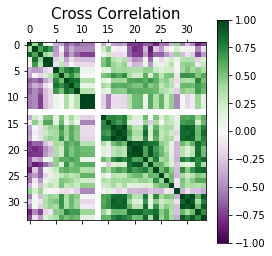

In [86]:
# Correlations among columns
plt.figure(figsize=(16,12))
plt.matshow(result.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Cross Correlation', size=15)
plt.colorbar()
plt.show()

<AxesSubplot:>

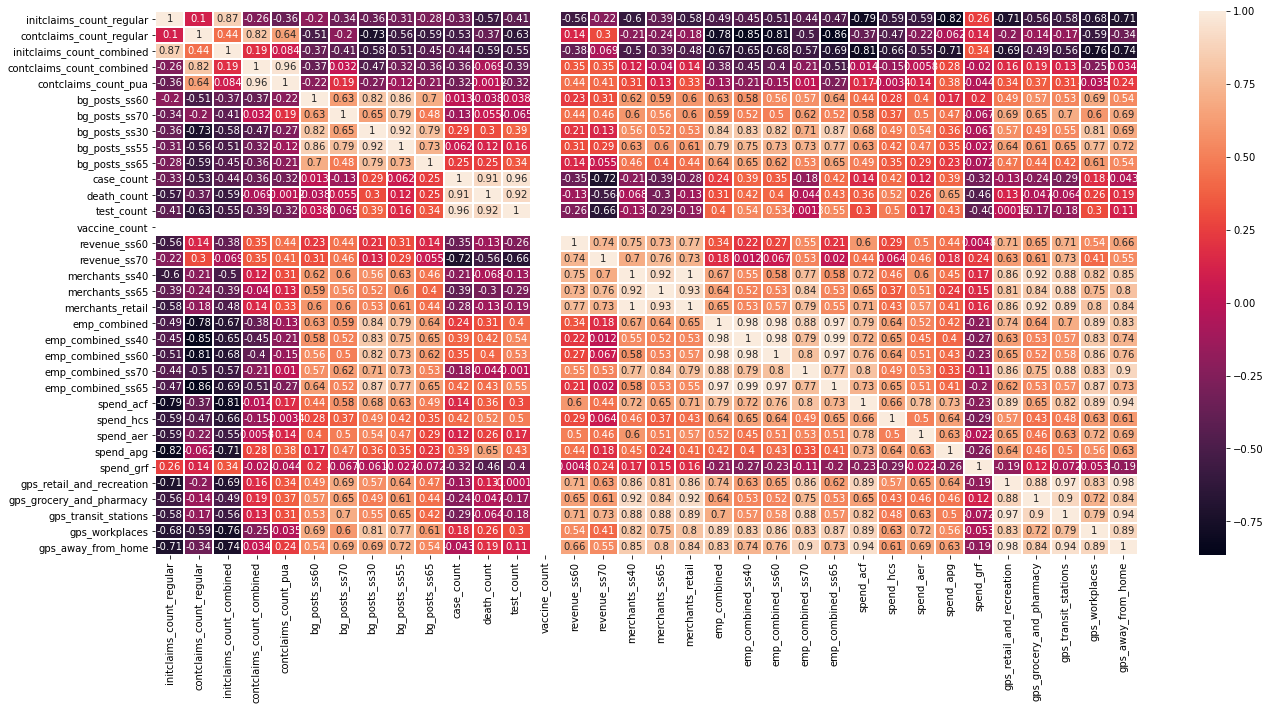

In [87]:
import seaborn as sns
plt.figure(figsize=(22,10))
sns.heatmap(result.corr(), linewidths=1, annot=True)

## Dropping off the highly correlated features and retaining the appropriate ones with corr >= 0.75

In [88]:
result1 = result.drop(['initclaims_count_combined', 'contclaims_count_combined', 'bg_posts_ss60', 'bg_posts_ss55', 'test_count',
                        'vaccine_count', 'merchants_ss40', 'merchants_retail', 'revenue_ss70', 'gps_retail_and_recreation', 
                         'gps_away_from_home', 'merchants_ss65', 'emp_combined', 'emp_combined_ss60', 'emp_combined_ss40'], axis = 1)
result1.shape

(327, 19)

In [89]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2020-03-07 to 2021-01-27
Freq: D
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   initclaims_count_regular  327 non-null    float64
 1   contclaims_count_regular  327 non-null    float64
 2   contclaims_count_pua      327 non-null    float64
 3   bg_posts_ss70             327 non-null    float64
 4   bg_posts_ss30             327 non-null    float64
 5   bg_posts_ss65             327 non-null    float64
 6   case_count                327 non-null    float64
 7   death_count               327 non-null    float64
 8   revenue_ss60              327 non-null    float64
 9   emp_combined_ss70         327 non-null    float64
 10  emp_combined_ss65         327 non-null    float64
 11  spend_acf                 327 non-null    float64
 12  spend_hcs                 327 non-null    float64
 13  spend_aer                 327 non-null

In [90]:
result1.to_csv(r'C:\Users\user\Desktop\New folder\results1.csv')